In [178]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-
"""
===============================================================================
CopyRight (c) By freeenergylab.
@Description:
A script can be used to visualize ABFE benchmark results.

@Author: Pengfei Li
@Date: Dec. 15, 2024
===============================================================================
"""
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict

pd.options.display.max_rows=None
pd.options.display.float_format = "{:,.2f}".format

def f1(x): return x - 1.0

def f2(x): return x + 1.0

def f3(x): return x - 2.0

def f4(x): return x + 2.0

def find_key_by_value(dict_, value_to_find):
    """Find value in value_list of dict_.
    Return its key, otherwise, None.
    """
    for key, value_list in dict_.items():
      if value_to_find in value_list:
        return key
    return None

def categorize(molname_list):
    """Categorize the different PDB targets."""
    pdb_targets = {'L99A': ['bnz', 'phn'],
                   'BRD4': ['08H', '08K', '15E', '1H2', '1K0', '1K1', '2TA', 'JQ1', 'ODR', 'R78'],
                   'TYK2': ['ejm_31', 'ejm_42', 'ejm_43', 'ejm_44', 'ejm_45', 'ejm_46', 'ejm_47', 'ejm_48', 'ejm_49', 'ejm_50', 'ejm_54', 'ejm_55', 'jmc_23', 'jmc_27', 'jmc_28', 'jmc_30'],
                   'THROMBIN': ['1a', '1b', '1c', '1d', '3a', '3b', '5', '6a', '6b', '6e', '7a'],
                  }
    eb_fmt = {'L99A': 'o',
              'BRD4': 'D',
              'TYK2': 's',
              'THROMBIN': '^',
             }
    eb_color = {'L99A': 'green',
                'BRD4': 'orange',
                'TYK2': 'blue',
                'THROMBIN': 'purple',
               }
    
    eb_fmts = []
    eb_colors = []
    eb_labels = []
    for molname in molname_list:
        key_ = find_key_by_value(pdb_targets, molname)
        eb_fmts.append(eb_fmt[key_])
        eb_colors.append(eb_color[key_])
        eb_labels.append(key_)
        
    return eb_fmts, eb_colors, eb_labels

In [179]:
def do_plot(df_input, figure_name):
    """Plot the comparison between the predicted and experimental results."""
    df = df_input.dropna()

    molname_list = df.index.tolist()
    eb_fmts, eb_colors, eb_labels = categorize(molname_list)
    exp_all_list = df['exp'].tolist()
    average_all_list = df['average'].tolist()
    std_all_list = df['stdev'].tolist()

    min_exp = min(exp_all_list)
    max_exp = max(exp_all_list)
    min_average = min(average_all_list)
    max_average = max(average_all_list)
    if (min_exp <= min_average):
        x_min = min_exp - 2.0
    else:
        x_min = min_average - 2.0
    if (max_exp >= max_average):
        x_max = max_exp + 2.0
    else:
        x_max = max_average + 2.0

    fig, ax = plt.subplots(figsize=(10,10))
    for index, _ in enumerate(molname_list):
        plt.errorbar(exp_all_list[index], average_all_list[index], yerr=None, fmt=eb_fmts[index], markerfacecolor=eb_colors[index], ms=8, color=eb_colors[index], elinewidth=2, capsize=4, label=eb_labels[index])
        
#     metric_name = [' ', 'RMSE', r'$R_{pearson}$',]
#     metric1 = ['L99A', '%.2f' % 0.27, '%.2f' % 1.00,]
#     metric2 = ['BRD4', '%.2f' % 1.81, '%.2f' % 0.71,]
#     metric3 = ['TYK2', '%.2f' % 0.99, '%.2f' % 0.78,]
#     metric4 = ['Thrombin', '%.2f' % 1.04, '%.2f' % 0.53,]
#     cell_text = []
#     for i in range(len(metric_name)):
#         cell_text.append([metric_name[i], str(metric1[i]), str(metric2[i]), str(metric3[i]), str(metric4[i])])
#     plt.table(cellText=cell_text, edges='closed', colLabels=None, loc='best', fontsize=20,)
#     ax.spines['right'].set_color('none')
#     ax.spines['top'].set_color('none')
    ax.xaxis.set_minor_locator(MultipleLocator(1.0))
    ax.yaxis.set_minor_locator(MultipleLocator(1.0))
    ax.tick_params(axis='both', which='major', labelsize=18)
    t = np.arange(x_min, x_max, 1e-5)
    y1 = f1(t)
    y2 = f2(t)
    y3 = f3(t)
    y4 = f4(t)
    plt.fill_between(t, y3, y4, facecolor='lightgrey', interpolate=False)
    plt.fill_between(t, y1, y2, facecolor='grey', interpolate=False)

    plt.title('', loc='center')
    plt.xlabel(r'$\Delta G_{bind}^{experiment}$ [kcal/mol]', fontsize=20)
    plt.ylabel(r'$\Delta G_{bind}^{predicted}$ [kcal/mol]', fontsize=20)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc='upper left', prop={'size':20}, shadow=False)
    plt.xlim(x_min, x_max)
    plt.ylim(x_min, x_max)
    plt.savefig(f'{figure_name}.pdf')

In [180]:
df = pd.read_csv("ALL_MBAR_Comparison_shift.csv", sep='\s+')

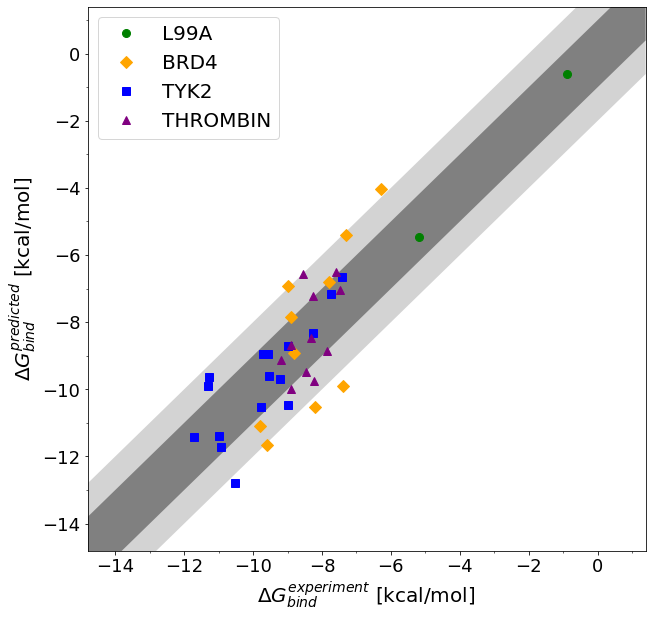

In [181]:
do_plot(df_input=df, figure_name='ALL_MBAR_Comparison_shift')